#1. Introduction

This dataset contains historical daily stock market data for a financial index or security, providing essential information such as opening, closing, highest, and lowest prices, as well as trading volumes. With over 112,000 records spanning multiple decades, it offers a valuable resource for analyzing market trends, price volatility, and trading patterns. This dataset is ideal for building predictive models, assessing investment risks, and creating data-driven trading strategies.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#2. Data Loading and Preprocessing

Data Loading: The dataset was loaded into a Pandas DataFrame for easy manipulation

In [ ]:
df=pd.read_csv("Market.csv")
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,12/31/1965,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,5/27/2021,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,5/28/2021,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,5/31/2021,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,6/1/2021,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


df.info() provided a summary of data types and non-null counts.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110252 non-null  float64
 4   Low        110251 non-null  float64
 5   Close      110250 non-null  float64
 6   Adj Close  110244 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


df.describe() offered a statistical overview of numerical features

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,110253.000000,110252.000000,110251.000000,110250.000000,110244.000000,1.102530e+05
mean,7658.561932,7704.538416,7608.129749,7657.740822,7657.982529,1.273975e+09
std,9011.455529,9066.605458,8954.536718,9011.555549,9011.723572,4.315783e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1855.060059,1864.687470,1844.015015,1855.347473,1855.057556,0.000000e+00
50%,5194.399902,5226.750000,5154.299805,5194.889892,5195.699951,4.329000e+05
75%,10134.299810,10207.827635,10060.369630,10134.867430,10135.512452,1.734314e+08
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10


df.shape revealed the dataset dimensions.

In [ ]:
df.shape

(112457, 8)

Missing Values : df.isnull().sum()

In [ ]:
df.isnull().sum()

,0
Index,0
Date,0
Open,2204
High,2205
Low,2206
Close,2207
Adj Close,2213
Volume,2204


Filling the missing values using fillna with median

In [ ]:
df.fillna(df[["Open","High","Low","Close","Adj Close","Volume"]].median(),inplace=True)

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
112452,False
112453,False
112454,False
112455,False


In [ ]:
df.isnull().sum()

,0
Index,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


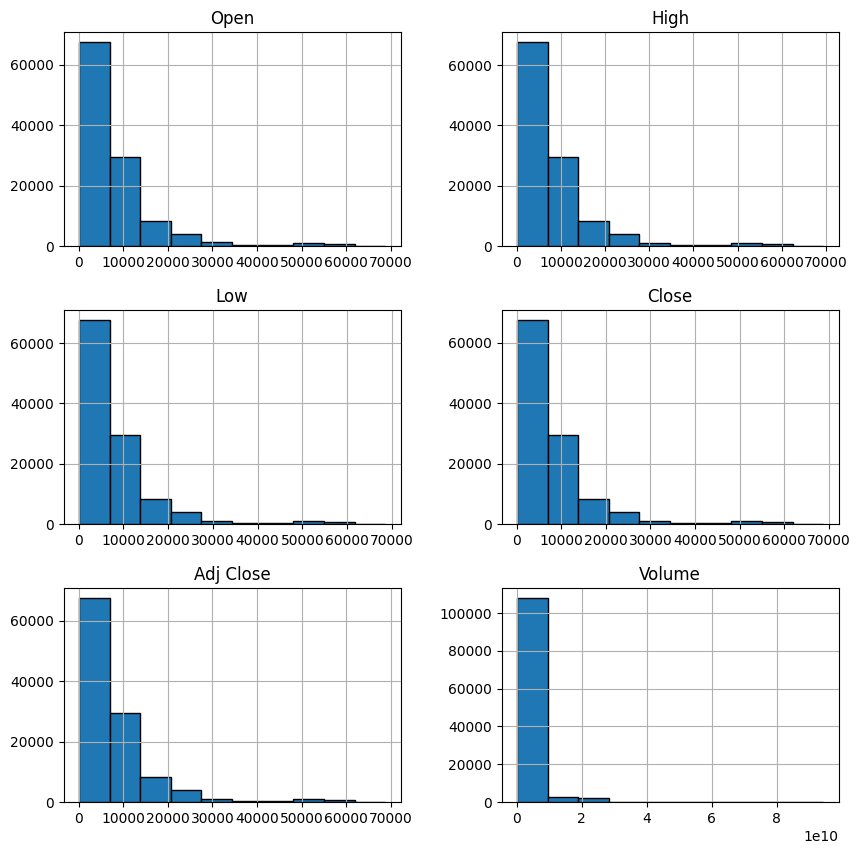

In [ ]:
df.hist(edgecolor="black",figsize=(10,10))
plt.show()

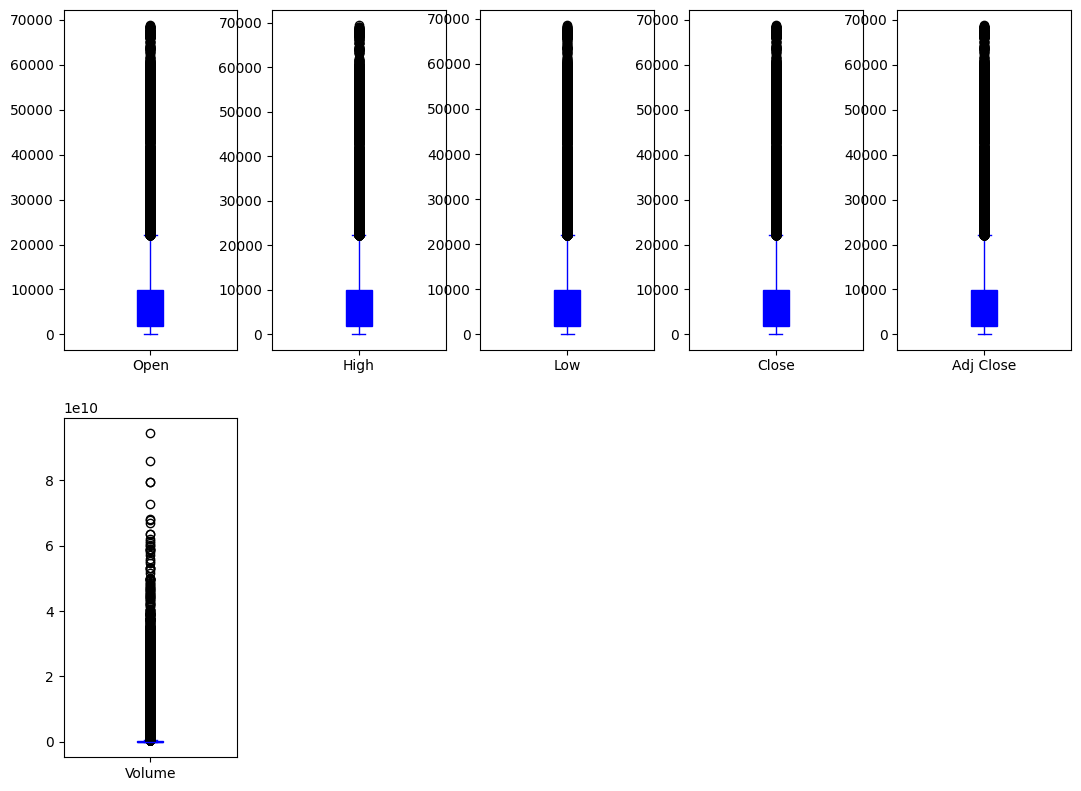

In [ ]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

In [ ]:
df["Index"]=le.fit_transform(df["Index"])
df["Date"]=le.fit_transform(df["Date"])

In [ ]:
correlation=df.corr()

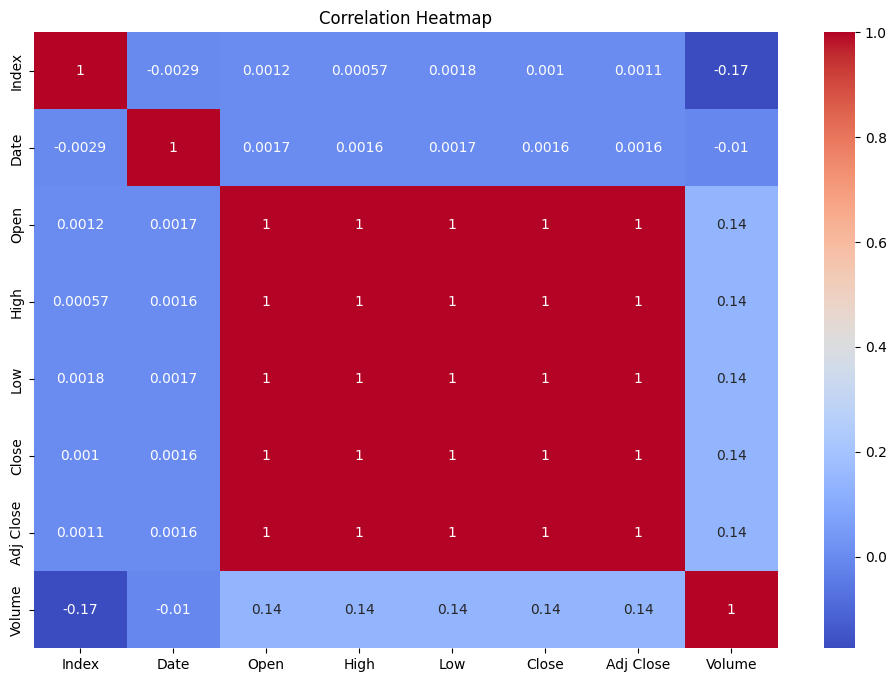

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data=np.log(df+1)

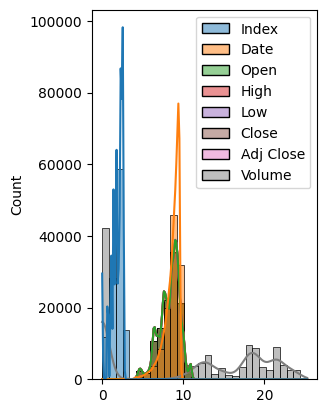

In [ ]:
plt.subplot(1,2,2)
sns.histplot(data,bins=30,kde=True)
plt.show()

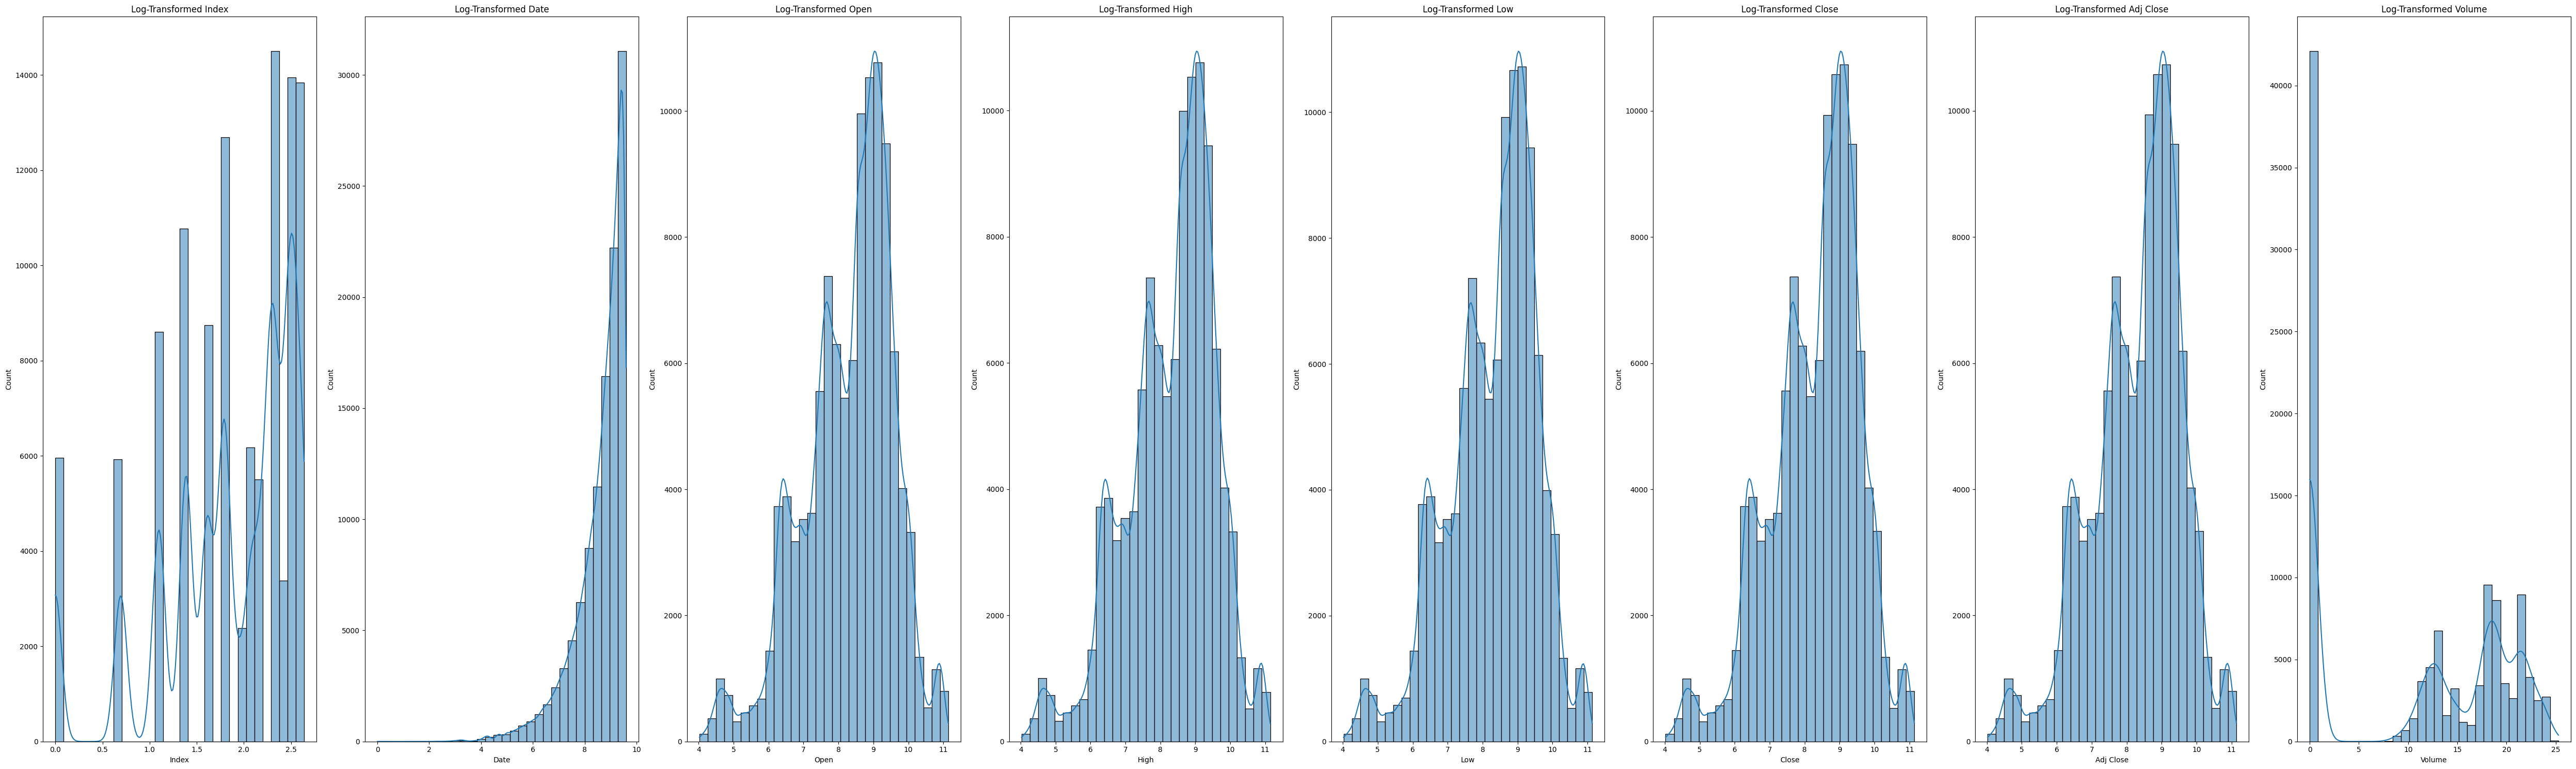

In [ ]:
num_features = data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers_iqr(data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5  * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers from the DataFrame
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered
for i in ['Index','Date','Open','High','Low','Close','Adj Close','Volume']:
    data = remove_outliers_iqr(data, i)

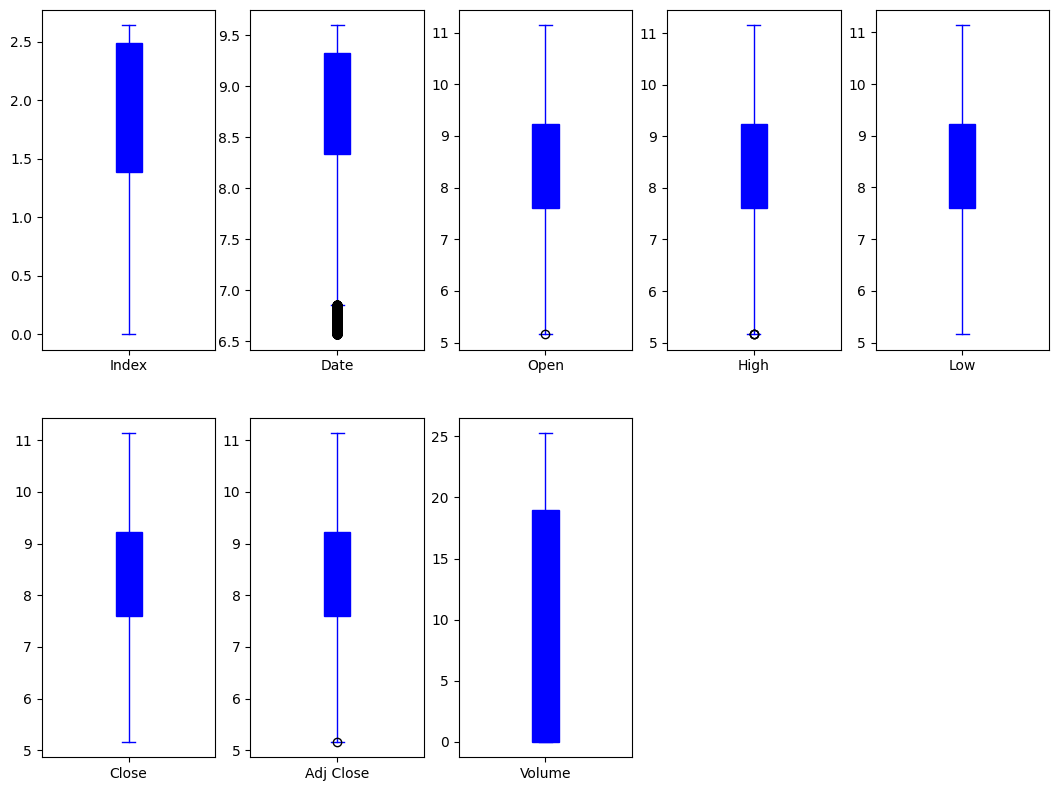

In [ ]:
data.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

In [ ]:
data.shape

(104906, 8)

In [ ]:
x = data[['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
y = data['Adj Close']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([6.36661124, 9.03852948, 7.6328161 , ..., 8.75757685, 7.5795447 ,
       7.55499058])

Text(0, 0.5, 'Actual price')

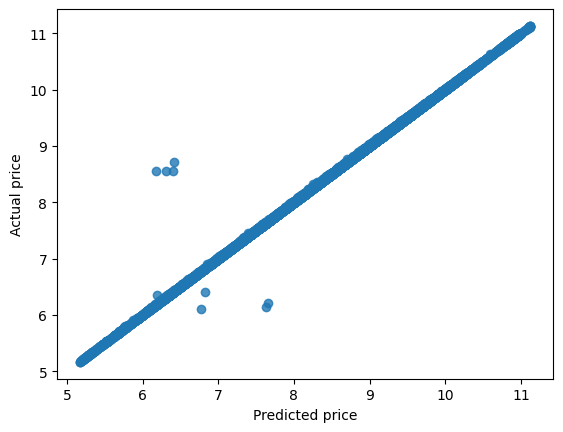

In [ ]:
sns.regplot(x=y_pred,y=y_test)
plt.xlabel("Predicted price")
plt.ylabel("Actual price")

In [ ]:
mean_squared_error(y_test,y_pred)

0.0012450472248216951

In [ ]:
r2_score(y_test,y_pred)

0.9990669770076059

In [ ]:
mean_absolute_error(y_test,y_pred)

0.003760757246252964